In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

## SideNote: the javascript below lets you export the interactive figures to an html page

In [135]:
%%javascript
//hack to fix export
require.config({
  paths: {
    d3: 'https://cdnjs.cloudflare.com/ajax/libs/d3/5.9.2/d3',
    jquery: 'https://code.jquery.com/jquery-3.4.1.min',
    plotly: 'https://cdn.plot.ly/plotly-latest.min'
  },

  shim: {
    plotly: {
      deps: ['d3', 'jquery'],
      exports: 'plotly'
    }
  }
});

<IPython.core.display.Javascript object>

In [147]:
# load county level  
# there is also a state level data but you can get the same values by adding up
# counties so no need to double load files
file = 'us-counties.csv'
counties = pd.read_csv(file)
counties.head() # previews the dataframe

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [148]:
# show a bar graph of state by state totals

# first step - get state totals

# the data is set as total cases each day so the latest total is the latest date
countiesLatest = counties.loc[counties.date == counties.date.max()]

# group by state and get the sums
stateTotLatest = countiesLatest.groupby('state').sum()
stateTotLatest.head() # previews the dataframe

,fips,cases,deaths
state,,,
Alabama,63115.0,947,11
Alaska,12642.0,120,2
Arizona,60208.0,1169,14
Arkansas,258705.0,567,11
California,296827.0,7423,147


In [149]:
# use plotly to make some interactive charts:
import plotly.graph_objects as go

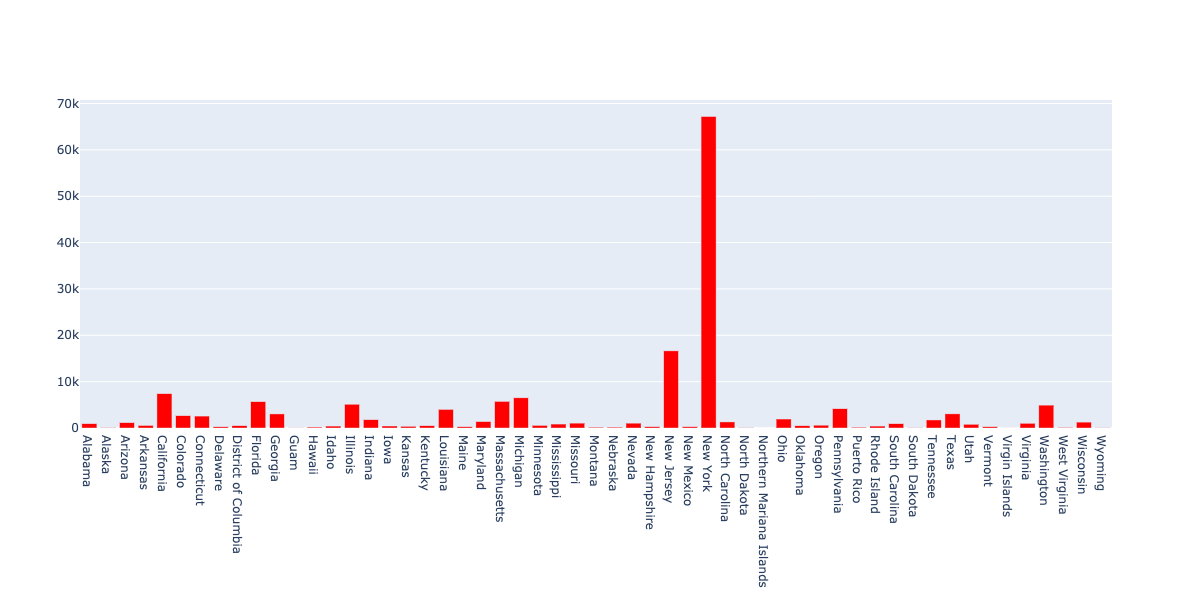

In [150]:
# graph 1: interactive bar chart with state totals 

fig = go.Figure(go.Bar(
    x=stateTotLatest.index,
    y=stateTotLatest.cases,
    text=stateTotLatest.cases,
    hovertemplate='%{x}: %{y} <extra></extra>',
    marker_color='red'
),
                layout=
                    {'width':1000, 'height':600} 
                
               )

# have to call figure show
fig.show()

In [183]:
# now lets make a graph to show change over time in each state

# calculate the totals in each state for each day
stateTot = counties.groupby(['date', 'state']).sum()
stateTot = stateTot.reset_index(level=[0,1]) # this resets the indexing 
stateTot.head()


,date,state,fips,cases,deaths
0,2020-01-21,Washington,53061.0,1,0
1,2020-01-22,Washington,53061.0,1,0
2,2020-01-23,Washington,53061.0,1,0
3,2020-01-24,Illinois,17031.0,1,0
4,2020-01-24,Washington,53061.0,1,0


In [185]:
# testing
statein = stateTot.loc[stateTot.state =='New York']
statein.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,0.0,1,0
261,2020-03-02,New York,0.0,1,0
276,2020-03-03,New York,0.0,2,0
293,2020-03-04,New York,36119.0,11,0
313,2020-03-05,New York,72178.0,22,0


In [213]:
data = []
for name, group in stateTot.groupby('state'):
    data.append(go.Scatter(
        x=group.date,
        y=group.cases,
        name=name
    
    )
    
    )

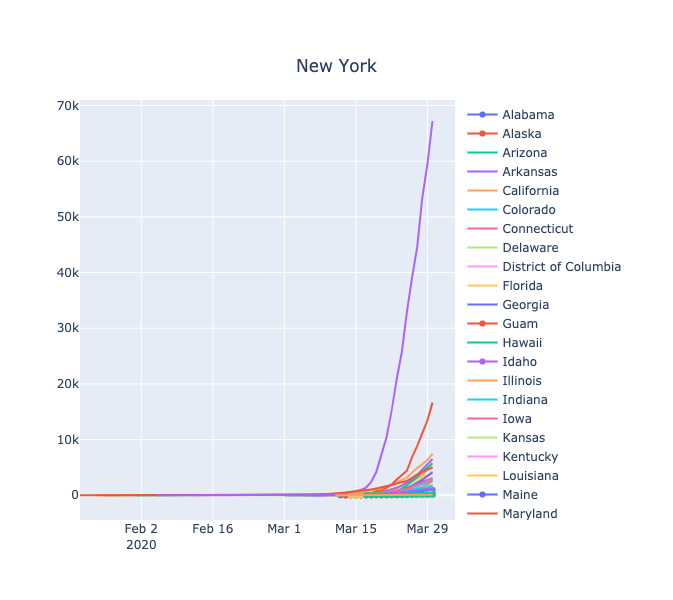

In [217]:
# make an interactive time series plot using plotly
fig = go.Figure(
        data=data,
    layout={
        'width':600,
        'height':600
    } 
)

fig.update_layout(
    title={
        'text': statein.state.unique()[0],
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [ ]:
# now add the dropdowns

